# Tutorial to compute Feldman-Cousins intervals
## Copyright Pietro Vischia, 2020, pietro.vischia@cern.ch

Companion code for Statistics book to be published 2021

The Feldman-Cousins procedure is actually the Neyman procedure, complemented with an ordering principle based on the likelihood ratio.

For a generic model, the likelihood ratio test statistic can be written as:

q(\theta) = -2ln( L(data|\theta, \hat{\alpha}_\theta)/L(data|\hat{\theta}, \hat{\alpha}))
          = -2 ln(L(data|\theta, \hat{\alpha}_\theta) -2 ln(data|\hat{\theta}, \hat{\alpha})

where \theta is the parameter of interest, and \alpha is the (vector of) nuisance parameter that is profiled (i.e. fixed to its maximum likelihood estimate conditional to the value of the POI, in the numerator). The denominator contains the joint global MLEs for both \theta and \alpha.

The Feldman-Cousins procedure consists, given a critical value \alpha, in doing the following for each value of the POI \theta:

    - compute the observed test statistic q_{obs}(\theta)
    - compute the expected distribution of q(\theta) conditional to \theta being the true value of the parameter (i.e. under the hypothesis of \theta being the true value)
    - accept the point in the region if p_{\theta} = P[ q(\theta)>q_{obs}(\theta)|\theta]>\alpha
    
We shall try it out now.

In [1]:
import math
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#First we need a likelihood function, or even better the log-likelihood

# Let's assume we have a sample of N i.i.d. normal random variables with unit variance inserted in a vector x, then the likelihood is:
def lnL(x, theta):
    # Gaussian likelihood
    N=len(x)
    return -N/2.*math.log(2*math.pi)-1/2.*sum((x-[theta for i in range(len(x))])**2)

# Since we are at it, let's also write down the MLE, that in case of a gaussian likelhood we know analytically it is the mean
# We have to slightly modify it, though, to account for the physical boundary (we assume that for a measurement x, the physically-allowed value of the MLE for theta is therefore max(0,x)

def mle(x):
    return max([sum(x)/len(x), 0.])

theta space shape: (20,) dataspace: (10,)


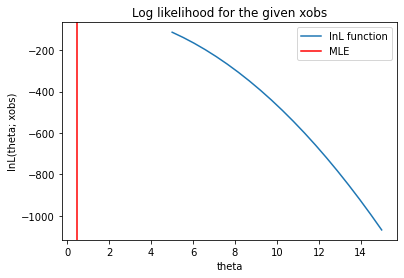

In [3]:
# As a test, now let's plot the log likelihood for a specific data realization
#xobs=np.random.normal(loc=10, scale=1.0, size=10)
xobs=np.random.normal(loc=0.5, scale=1.0, size=10)

# Let's scan a parameter range in theta from 5 to 15
thetaspace=np.linspace(5., 15., num=20)
print('theta space shape:', thetaspace.shape, 'dataspace:', xobs.shape)

mylnL=[ lnL(xobs,theta) for theta in thetaspace ]

plt.plot(thetaspace, mylnL, label='lnL function')
plt.axvline(x=mle(xobs), c='red', label='MLE')
plt.title('Log likelihood for the given xobs')
plt.xlabel('theta')
plt.ylabel('lnL(theta; xobs)')
plt.legend(loc='best')

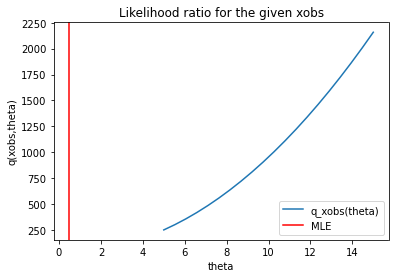

In [4]:
# Now we need the likelihood ratio.
# Let's first assume we don't have any nuisance parameter.

def q(x, theta):
    return -2*lnL(x, theta) -2*lnL(x,mle(x)) 

# Let's plot the likelihood ratio

myq=[ q(xobs,theta) for theta in thetaspace ]

plt.plot(thetaspace, myq, label='q_xobs(theta)')
plt.axvline(x=mle(xobs), c='red', label='MLE')
plt.title('Likelihood ratio for the given xobs')
plt.xlabel('theta')
plt.ylabel('q(xobs,theta)')
plt.legend(loc='best')

In [5]:
# Let's generate the distribution of the test statistic for a generic measurement of the mean

def qdist(theta, anal):
    measurements=np.linspace(-5.,15., num=2000)
    return [ q(np.random.normal(loc=mu, scale=1.0, size=10), theta) for mu in measurements] 

# Given this function, we also need a function to compute its integral

def px(qdist,qobs):
    # VERY crude integral
    return(float(sum([ x for x in qdist if x >=qobs]) / sum(qdist)))


In [6]:
# Choose the critical value
alpha=0.68

xIntervals=[]
mymeasurements=np.linspace(-5.,15., num=50)

for theta in thetaspace:
    xInterval=[]
    for mu in mymeasurements:
        xobsi=np.random.normal(loc=mu, scale=1.0, size=10)
        qobs=q(xobsi,theta)
        qcond=qdist(theta,True)
        if px(qcond,qobs) > alpha:
            xInterval.append(theta)
    xIntervals.append(xInterval)

print(xIntervals)

[(-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (5.0, 5.526315789473684), (5.0, 6.578947368421053), (5.0, 6.052631578947368), (5.0, 6.578947368421053), (5.0, 7.105263157894736), (5.0, 7.105263157894736), (5.0, 7.631578947368421), (5.0, 8.157894736842106), (5.0, 8.157894736842106), (5.0, 8.157894736842106), (5.0, 8.68421052631579), (5.0, 9.736842105263158), (5.0, 9.736842105263158), (5.0, 10.263157894736842), (5.0, 10.789473684210526), (6.052631578947368, 15.0), (5.526315789473684, 11.31578947368421), (6.578947368421053, 15.0), (6.052631578947368, 15.0), (7.105263157894736, 15.0), (8.157894736842106, 15.0), (8.157894736842106, 15.0), (8.157894736842106, 15.0), (8.157894736842106, 15.0), (9.210526315789473, 15.0), (9.736842105263158, 15.0), (9.210526315789473, 15.0), (10.789473684210526

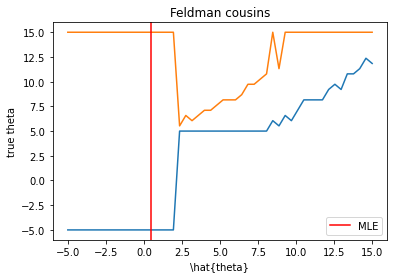

In [7]:
# Plot this

lower=[]
upper=[]
for i in xIntervals:
    lower.append(min(i))
    upper.append(max(i))
    
plt.plot(mymeasurements,lower)
plt.plot(mymeasurements,upper)
plt.axvline(x=mle(xobs), c='red', label='MLE')
plt.title('Feldman cousins')
plt.xlabel('\hat{theta}')
plt.ylabel('true theta')
plt.legend(loc='best')

In [2]:
# Reproduce Figure 10 of the Feldman-Cousins paper https://arxiv.org/abs/physics/9711021
# to illustrate what happens with a physical boundary.
# We assume the gaussian has a positive-definite mean

# For a measurement x, the physically-allowed value of the MLE for theta is therefore max(0,x)

# The likelihood ratio uses this thetabest in the denominator

In [34]:
# 1D Likelihood

def sample_from_pdf(theta,N):
    # Draw N toys from the gaussian pdf
    return np.random.normal(loc=theta, scale=1.0, size=N)


def lnL(x, theta):
    return math.log(2*math.pi)-1/2.*(x-theta)**2


def mle(x):
    # This implements the boundary at zero
    return max(0.,x)

# here we already did the computation of the likelihood ratio (eq. 4.3 of the paper)
def q(x, theta):
    # The trick: 
    #return math.exp(-(x-theta)**2/2.) if x>=0 else math.exp(x*theta -theta**2/2)
    return -(x-theta)**2/2. if x>=0 else x*theta -theta**2/2


In [35]:

def qdist(theta,measurements=None):
    if measurements is None:
        measurements=np.linspace(-2.,4., num=2000)
    return [ q(x, theta) for x in measurements] 

# Given this function, we also need a function to compute its integral

def px(qdist,qobs,xspace=None,noprint=False):
    # VERY crude integral
    if xspace is None:
        return(float(sum([ x for x in qdist if x >qobs])/sum(qdist)))
    portion=[]
    for i,x in zip(qdist,xspace):
        if i>qobs:
            portion.append(x)

    return (portion[-1]-portion[0])/(xspace[-1]-xspace[0])

#alpha=0.10 
#xspace=np.linspace(-2.,4., num=2000)
#qcond=qdist(2,xspace)
#plt.plot(xspace,qcond, label='qcond | theta=2')
#plt.axhline(y=alpha, color='r', linestyle='-')
#plt.plot(xspace,[q(i,2) for i in xspace], label='qobs | theta=')
#interval=[]
#px(qcond, q(1,2), xspace)
##plt.plot(xspace, [px(qcond,q(i,2),xspace,True) for i in xspace], label='p(qobs>qcond | theta=2)')
#plt.xlabel('measurement x')
#for xi in xspace:
#    qobs=q(xi,2)
#    #print(px(qcond,qobs))
#    if px(qcond,qobs)>alpha:
#        interval.append([xi,qobs])
#interval=np.array(interval)
#plt.legend(loc='best')
#print(interval[:,0])

Prob is zero, qs is  -9.08010602664128
839 1000
Prob is zero, qs is  -8.121476509889394
789 1000
Prob is zero, qs is  -5.754995697378132
800 1000
Prob is zero, qs is  -5.438278227351981
776 1000
Prob is zero, qs is  -5.208287534247463
768 1000
Prob is zero, qs is  -4.536227897513106
721 1000
Prob is zero, qs is  -3.718996947550276
671 1000
Prob is zero, qs is  -3.367407472928695
677 1000
Prob is zero, qs is  -3.3386843252685554
638 1000
Prob is zero, qs is  -1.7001624834342868
603 1000
Prob is zero, qs is  -1.1261326575956365
584 1000
Prob is zero, qs is  -0.5979668816193379
538 1000
Prob is zero, qs is  -0.15114125917090435
512 1000
GNEGNE 5.635943907449349e-10 5.635943907449349e-10 6.868848169262773 [5.56969932e-01 1.31714165e-01 2.45706699e-01 3.22578938e-02
 2.83845655e-03 1.53111607e+00 4.86816402e-01 3.02388843e-01
 1.13014474e-01 1.25100886e-01 3.83612236e-01 8.81620080e-02
 8.23641429e-02 5.42459889e-08 1.73332633e-01 1.61323891e-01
 9.21788686e-02 5.19588045e-01 9.83241325e-02

GNEGNE 4.222484274750324e-07 4.222484274750324e-07 5.399041435003639 [1.28888301e+00 6.64103959e-02 7.70726978e-01 2.00314357e+00
 1.17344414e+00 5.12348921e-02 3.09872960e-01 2.01812947e+00
 9.18389177e-02 3.70761317e-03 1.74395939e+00 3.62225289e-01
 1.91752050e-01 3.10582603e-03 4.04561742e-01 8.38589868e-03
 4.55498999e-05 2.04098556e-01 6.05891960e-01 3.18402419e+00
 1.06227352e-01 7.64197309e-01 1.28477772e+00 2.08089656e+00
 1.09642524e+00 2.32297808e-01 8.34694096e-03 2.01120490e-01
 3.52466198e-01 1.90709694e-01 5.87700651e-01 5.94471942e-01
 7.80280205e-01 5.79680912e-02 1.45134321e-01 2.71314400e-01
 7.04628768e-01 8.01410747e-02 1.89409019e+00 2.11230330e-01
 2.03206019e+00 1.95261525e+00 3.88166102e-02 7.61492566e-02
 4.35586891e-01 6.10583314e-04 5.69902925e-01 1.08274003e-02
 3.24153673e-02 1.69526332e-01 4.00189391e-01 3.72264653e-01
 2.13268151e-01 3.39301516e-02 6.23390494e-01 7.54982675e-01
 7.32670247e-02 2.51656615e-03 4.32548190e-01 8.50315405e-01
 4.70383643e-02 

GNEGNE 8.238261318032329e-07 8.238261318032329e-07 4.78864685978213 [9.36394244e-02 5.00674715e-01 1.76848124e-01 3.35396453e-01
 7.22543876e-01 1.40353763e-01 3.18358095e-01 2.15017516e-03
 1.69854372e-01 2.63959359e-01 1.91373030e+00 4.28917688e-02
 2.93637002e-01 5.53272036e-02 2.90258855e-05 2.41513841e+00
 7.39631761e-01 9.34023910e-02 8.26415197e-02 2.91583896e-01
 4.05712157e-01 8.00356545e-03 1.87447113e-01 1.64391265e+00
 7.93749333e-02 1.29987036e+00 1.67077768e-01 5.43984707e-02
 2.00664198e-02 4.23642319e-01 6.24284066e-01 2.68938465e-01
 2.16820797e+00 3.04579356e-02 1.07807518e+00 7.60897448e-01
 1.80843271e+00 1.22022486e+00 1.27577188e-01 1.11254370e+00
 5.81136023e-01 5.07633186e-01 8.50519862e-02 1.15869862e-01
 2.49368802e-03 2.07494941e-02 2.18642459e+00 7.72731858e-01
 8.25515746e-02 2.86172525e-01 1.87684223e-01 5.20021190e-03
 8.55618350e-01 4.01978193e-02 7.59867477e-01 2.35104001e-01
 2.95853072e-01 1.34042455e-01 2.28069710e-01 1.95961375e-01
 3.91841360e-01 5

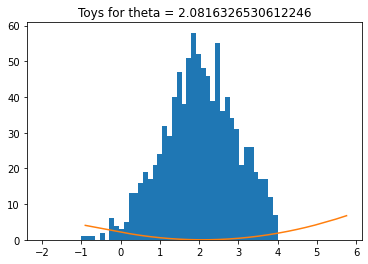

In [79]:
alpha=1-0.68 # for a 90% CI
xIntervals=[]
mymeasurements=np.linspace(-2.,4., num=50)
thetaspace=np.linspace(-2.,6., num=50)
count=0

exampletoys=None
examplearr=None
for theta in thetaspace:
    #1. Draw a toy from the pdf
    toys=sample_from_pdf(theta,1000)
    #2. Compute the likelihood ratio for this toy
    xandqobs = [[xtoy, -q(xtoy,theta)] for xtoy in toys]
    #xandqobs= [[xtoy, -lnL(xtoy,theta)+lnL(xtoy,mle(xtoy))] for xtoy in toys]
    #3. Find the value of qccritical such that alpha of the toy experiments have q<qcritical
    t=np.array(xandqobs)
    qcrit=0.
    #print(min(t[:,1]),max(t[:,1]))
    for qs in np.linspace(min(t[:,1]),max(t[:,1]),num=10000):
        # Since we start from qcrit=0, at first all the values will be above
        # so the loop is until the fraction becomes < alpha
        prob=float(len([ x for x in xandqobs if x[1] <qs])/len(xandqobs))
        #if count==25:
        #    print(prob, qs, xandqobs)
        if abs(qs)<0.0001:
            print('GNEGNE', qs, min(t[:,1]),max(t[:,1]), t[:,1])
        if prob==0:
            print('Prob is zero, qs is ', qs)
        if prob < alpha:
            break
        else: # this trick is to pick the last value for which prob >=alpha
            qcrit=qs
    
    #4. The interval is given by the values of x s.t. qobstoy < qcritical
    xInterval= [ x[0] for x in xandqobs if x[1] < qcrit]
    print(len(xInterval), len(toys))
    # Sort by likelihood ratio, even if they should already be 
    #sorted_by_second = sorted(xInterval, key=lambda tup: tup[1])
    #xInterval.sort(key = lambda tup: tup[1]) 
    #xInterval.sort(key = lambda tup: tup[0])
    xInterval.sort()
    xIntervals.append(xInterval)
    if count ==25:
        xandqobs.sort(key = lambda tup: tup[0])
        examplearr=np.array(xandqobs)
        exampletoys=toys
        exampleinterval=xInterval
    count+=1
    
plt.hist(exampletoys, bins=mymeasurements, label='Toys')
plt.plot(examplearr[:,0],examplearr[:,1], label='Likelihood ratio')
plt.title('Toys for theta = %s'%thetaspace[25])        
print('Example interval', exampleinterval)
    

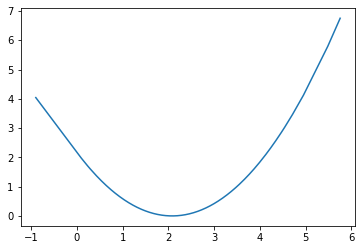

In [80]:
plt.plot(examplearr[:,0],examplearr[:,1], label='Likelihood ratio')


Text(0, 0.5, 'true theta')

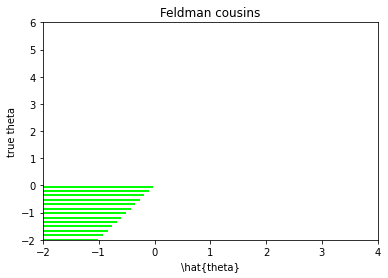

In [81]:

#print(xIntervals)

fc_intervals=[]
fc_colors=[]
for i, theta in zip(xIntervals, thetaspace):
    if len(i)==0:
        continue
    #fc_intervals.append([(i[0][0],theta),(i[-1][0],theta)])
    #fc_intervals.append([(min(i),theta),(max(i),theta)])
    fc_intervals.append([(i[0],theta),(i[-1],theta)])
    fc_colors.append([0,1,0,1]) # blue?
from matplotlib import collections  as mc
import pylab as pl
fc_coll = mc.LineCollection(fc_intervals, colors=np.array(fc_colors), linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(fc_coll)
ax.autoscale()
plt.xlim((min(mymeasurements),max(mymeasurements)))
plt.ylim((min(thetaspace), max(thetaspace)))

plt.title('Feldman cousins')
plt.xlabel('\hat{theta}')
plt.ylabel('true theta')


In [64]:
a = [[1,2], [2,4], [3,0], [4,5], [5,1]]

b= [ x[0] for x in a if x[1] < 2]

print(b)

[3, 5]


[[-1.8775510204081634, -1.7551020408163265, -1.6326530612244898, -1.510204081632653, -1.3877551020408163, -1.2653061224489797, -1.1428571428571428, -1.0204081632653061, -0.8979591836734695, -0.7755102040816326, -0.653061224489796, -0.5306122448979593, -0.40816326530612246, -0.2857142857142858, -0.16326530612244894, -0.04081632653061229, 0.08163265306122458, 0.204081632653061, 0.3265306122448979, 0.44897959183673475, 0.5714285714285712, 0.693877551020408, 0.8163265306122449, 0.9387755102040813, 1.0612244897959182, 1.183673469387755, 1.306122448979592, 1.4285714285714284, 1.5510204081632653, 1.6734693877551021, 1.7959183673469385, 1.9183673469387754, 2.040816326530612, 2.163265306122449, 2.2857142857142856, 2.408163265306122, 2.5306122448979593, 2.6530612244897958, 2.775510204081632, 2.8979591836734695, 3.020408163265306, 3.1428571428571423, 3.2653061224489797, 3.387755102040816, 3.5102040816326525, 3.63265306122449, 3.7551020408163263, 3.8775510204081627, 4.0], [-1.8775510204081634, -1.

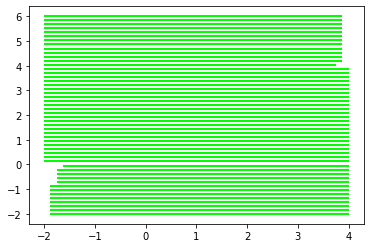

In [8]:
alpha=0.10 # for a 90% CI
xIntervals=[]
mymeasurements=np.linspace(-2.,4., num=50)
thetaspace=np.linspace(-2.,6., num=50)
for theta in thetaspace:
    xInterval=[]
    qcond=qdist(theta,mymeasurements)
    for xobsi in mymeasurements:
        qobs=q(xobsi,theta)
        if px(qcond,qobs) > alpha:
            #xInterval.append([xobsi,qobs])
            xInterval.append(xobsi)
    #thetaIntervals.append((min(thetaInterval),max(thetaInterval)) if len(thetaInterval)>0 else (-5., 15.))
    #sorted_by_second = sorted(xInterval, key=lambda tup: tup[1])
    #xIntervals.append(np.array(sorted_by_second)[:,0])
    xIntervals.append(xInterval)
print(xIntervals)

fc_intervals=[]
fc_colors=[]
for i, theta in zip(xIntervals, thetaspace):
    fc_intervals.append([(i[0],theta),(i[-1],theta)])
    fc_colors.append([0,1,0,1]) # blue?
from matplotlib import collections  as mc
import pylab as pl
fc_coll = mc.LineCollection(fc_intervals, colors=np.array(fc_colors), linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(fc_coll)
ax.autoscale()


#thetaIntervals=[]
#for xobsi in mymeasurements:
#    thetaInterval=[]
#    for theta in thetaspace:
#        qcond=qdist(theta,mymeasurements)
#        qobs=q(xobsi,theta)
#        if px(qcond,qobs) > alpha:
#            thetaInterval.append(theta)
#    #thetaIntervals.append((min(thetaInterval),max(thetaInterval)) if len(thetaInterval)>0 else (-5., 15.))
#    #sorted_by_second = sorted(xInterval, key=lambda tup: tup[1])
#    thetaIntervals.append(thetaInterval)
#print(thetaIntervals)


#fc_intervals=[]
#fc_colors=[]
#for x, thetaI in zip(mymeasurements, thetaIntervals):
#    fc_intervals.append([(x,thetaI[0]),(x,thetaI[-1])])
#    fc_colors.append([0,1,0,1]) # blue?
#from matplotlib import collections  as mc
#import pylab as pl
#fc_coll = mc.LineCollection(fc_intervals, colors=np.array(fc_colors), linewidths=2)
#fig, ax = pl.subplots()
#ax.add_collection(fc_coll)
#ax.autoscale()

No handles with labels found to put in legend.


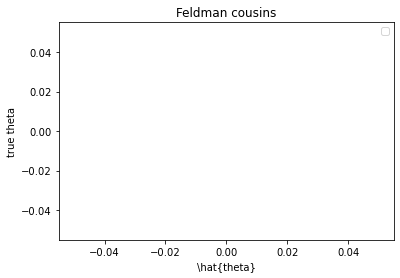

In [24]:
fc_intervals=[]
fc_colors=[]
for i, theta in zip(xIntervals, thetaspace):
    fc_intervals.append([(i[0],theta),(i[-1],theta)])
    fc_colors.append([0,1,0,1]) # blue?
from matplotlib import collections  as mc
import pylab as pl
fc_coll = mc.LineCollection(fc_intervals, colors=np.array(fc_colors), linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(fc_coll)
ax.autoscale()

# Plot this
#xobs=1.
#lower=[]
#upper=[]
#for i in mymeasurements:
#    lower.append(max(-2., ))
#for i, ttheta in zip(xIntervals, thetaspace):
#    mmin, mmax = findx(i,mymeasurements)
#    lower.append(mmin)
#    upper.append(mmax)
#plt.plot(mymeasurements,lower)
#plt.plot(mymeasurements,upper)
#plt.axvline(x=mle(xobs), c='red', label='MLE')
plt.title('Feldman cousins')
plt.xlabel('\hat{theta}')
plt.ylabel('true theta')
plt.legend(loc='best')

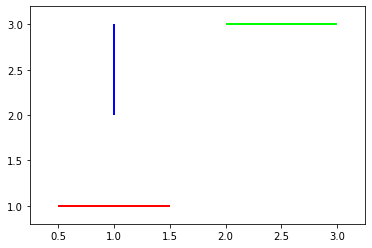

In [51]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines = [[(0.5, 1), (1.5, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)